In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv("../input/diabetes-dummy/diabetes.csv")
print("Daily consumption of soda & desserts, and the corresponding diabetes results")
data.rename(columns={"soda":"soda (ml)", "dessert":"dessert (grams)"})

Daily consumption of soda & desserts, and the corresponding diabetes results


,soda (ml),dessert (grams),diabetic
0,30,20,0
1,10,0,0
2,20,15,0
3,50,10,0
4,100,30,0
5,70,10,0
6,350,40,1
7,750,200,1
8,280,150,1
9,470,50,1


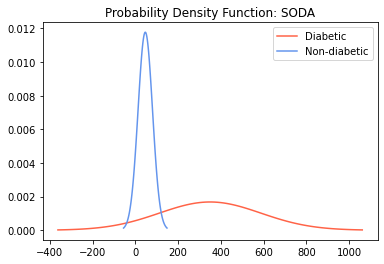

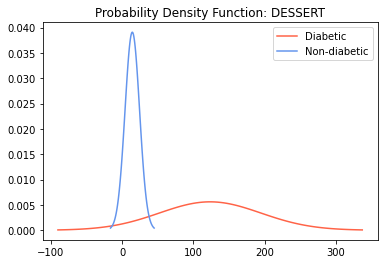

In [3]:
def draw_distribution(data, color='blue', label=""):
    mean = data.mean()
    variance = data.var()
    sigma = variance ** 0.5
    x = np.linspace(mean - 3*sigma, mean + 3*sigma, 100)
    y = stats.norm.pdf(x, mean, sigma)
    plt.plot(x, y, c=color, label=label)

# Draw the probability density function for every column
for column in data.columns[:-1]:
    positive = data[data["diabetic"] == 1][column]
    negative = data[data["diabetic"] == 0][column]
    draw_distribution(positive, color='tomato', label="Diabetic")
    draw_distribution(negative, color='cornflowerblue', label="Non-diabetic")
    plt.title("Probability Density Function: " + column.upper())
    plt.legend(loc="upper right")
    plt.show()

In [4]:
# Function to calculate the likelihood (y-axis on PDF)
def likelihood(x, mean, std):
    return stats.norm.pdf(x, mean, std)

def gaussian_bayes(X, y, sample):
    classes = y.unique()
    classes_likelihoods = np.log(y.value_counts() / y.shape[0])
    for column, i in zip(X.columns, range(0, X.columns.shape[0])):
        for _class, j in zip(classes, range(classes.shape[0])):
            mean = X[y == _class][column].mean()
            std = X[y == _class][column].std()
            classes_likelihoods[j] *= np.log(likelihood(sample[i], mean, std))
    return classes_likelihoods

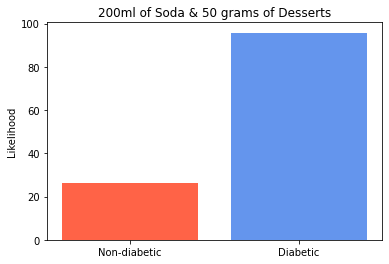

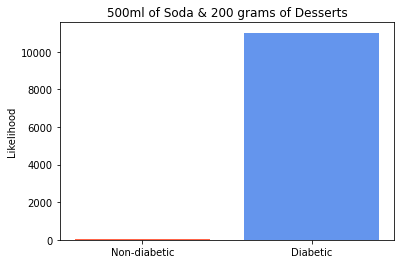

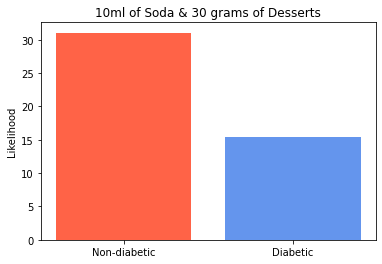

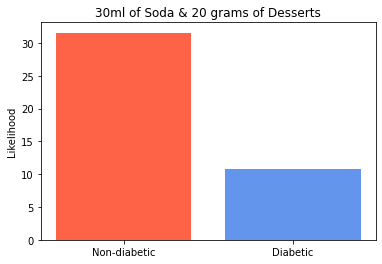

In [5]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]
daily_consumption_samples = np.array([
    [200, 50],
    [500, 200],
    [10, 30],
    [30, 20],
])

for sample in daily_consumption_samples:
    likelihoods = gaussian_bayes(X, y, sample).rename(index={0:"Non-diabetic", 1:"Diabetic"})
    likelihoods_absolute = likelihoods.abs().sum() - likelihoods.abs() # for visualization purposes
    plt.bar(likelihoods.index, likelihoods_absolute, color=['tomato', 'cornflowerblue'])
    plt.title(f"{sample[0]}ml of Soda & {sample[1]} grams of Desserts")
    plt.ylabel("Likelihood")
    plt.show()